# MLP trained on Fashion-MNIST dataset

In [437]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard

from matplotlib import pyplot as plt
import datetime

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Load Fashion-MNIST

In [438]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [439]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Plot some examples

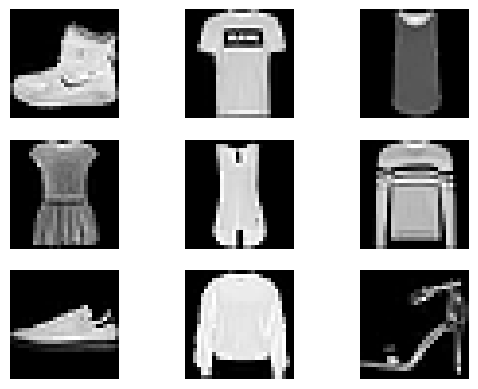

In [440]:
i = 0

for picture in x_train[:9]:
    plt.subplot(3, 3, i+1)
    plt.imshow(picture, cmap='gray')
    plt.axis('off')
    i = i + 1

plt.show()

## Create MLP

In [441]:
mlp = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

## Compile model

In [442]:
mlp.compile(
    optimizer=SGD(learning_rate=0.001),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

## Define TensorBoard callback

In [443]:
log_dir = "../logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=1)

## Train model

In [444]:
history = mlp.fit(
    x_train,
    y_train,
    epochs=25,
    validation_split=0.2,
    batch_size=32,
    shuffle=True,
    callbacks=[tensorboard]
)

Epoch 1/25
1500/1500 [==============================] - 12s 8ms/step - loss: 2.7549 - accuracy: 0.5934 - val_loss: 1.1012 - val_accuracy: 0.6675
Epoch 2/25
1500/1500 [==============================] - 11s 8ms/step - loss: 1.0133 - accuracy: 0.6920 - val_loss: 0.9820 - val_accuracy: 0.7007
Epoch 3/25
1500/1500 [==============================] - 12s 8ms/step - loss: 0.8866 - accuracy: 0.7252 - val_loss: 0.8429 - val_accuracy: 0.7469
Epoch 4/25
1500/1500 [==============================] - 12s 8ms/step - loss: 0.7749 - accuracy: 0.7478 - val_loss: 0.8704 - val_accuracy: 0.7414
Epoch 5/25
1500/1500 [==============================] - 12s 8ms/step - loss: 0.7099 - accuracy: 0.7468 - val_loss: 0.7005 - val_accuracy: 0.7258
Epoch 6/25
1500/1500 [==============================] - 11s 8ms/step - loss: 0.6616 - accuracy: 0.7462 - val_loss: 0.8001 - val_accuracy: 0.7188
Epoch 7/25
1500/1500 [==============================] - 12s 8ms/step - loss: 0.6324 - accuracy: 0.7501 - val_loss: 0.6785 - val_ac

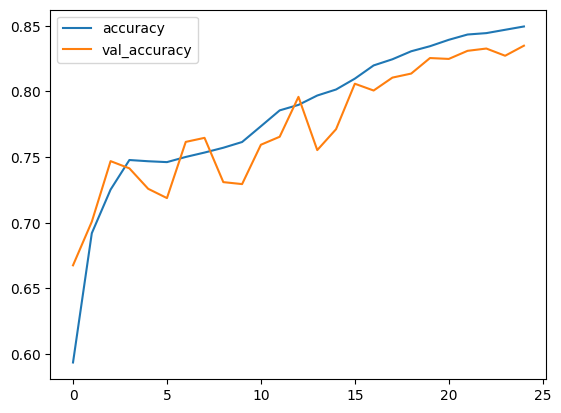

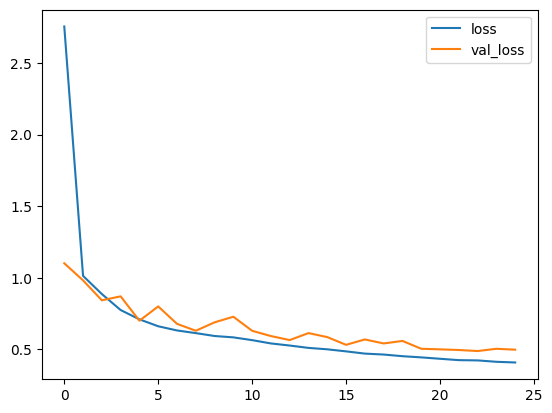

In [445]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

## Evaluate model

In [446]:
mlp.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.5222 - accuracy: 0.8227


[0.5222477316856384, 0.822700023651123]